In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
import cv2
import gc
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import time

### Resize Train set (128x128) and Convert feather format

In [2]:
start_time = time.time()
data0 = pd.read_parquet('/mnt/m2s2/Repos/kaggle-bengaliai-cv19/input/bengaliai-cv19/train_image_data_0.parquet')
data1 = pd.read_parquet('/mnt/m2s2/Repos/kaggle-bengaliai-cv19/input/bengaliai-cv19/train_image_data_1.parquet')
data2 = pd.read_parquet('/mnt/m2s2/Repos/kaggle-bengaliai-cv19/input/bengaliai-cv19/train_image_data_2.parquet')
data3 = pd.read_parquet('/mnt/m2s2/Repos/kaggle-bengaliai-cv19/input/bengaliai-cv19/train_image_data_3.parquet')
print("--- %s seconds ---" % (time.time() - start_time))

--- 9.763850450515747 seconds ---


In [3]:
def Resize(df,size=128):
    resized = {} 
    df = df.set_index('image_id')
    for i in tqdm(range(df.shape[0])):
        
        data = 255 - df.loc[df.index[i]].values.reshape(137,236)
        data = data * (255.0/ data.max())
        
        image = cv2.resize(data,(size,size)).astype(np.uint8)
        
#         img = (data[idx]*(255.0/data[idx].max())).astype(np.uint8)

        resized[df.index[i]] = image.reshape(-1)
    resized = pd.DataFrame(resized).T.reset_index()
    resized.columns = resized.columns.astype(str)
    resized.rename(columns={'index':'image_id'},inplace=True)
    return resized

In [4]:
data0 = Resize(data0)
data0.to_feather('train_data_00.feather')
del data0
data1 = Resize(data1)
data1.to_feather('train_data_1.feather')
del data1
data2 = Resize(data2)
data2.to_feather('train_data_2.feather')
del data2
data3 = Resize(data3)
data3.to_feather('train_data_3.feather')
del data3

/home/robmulla/anaconda3/envs/kaggle/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


### Resize test set (128x128) and Convert feather format

In [5]:
start_time = time.time()
data0 = pd.read_parquet('/mnt/m2s2/Repos/kaggle-bengaliai-cv19/input/bengaliai-cv19/test_image_data_0.parquet')
data1 = pd.read_parquet('/mnt/m2s2/Repos/kaggle-bengaliai-cv19/input/bengaliai-cv19/test_image_data_1.parquet')
data2 = pd.read_parquet('/mnt/m2s2/Repos/kaggle-bengaliai-cv19/input/bengaliai-cv19/test_image_data_2.parquet')
data3 = pd.read_parquet('/mnt/m2s2/Repos/kaggle-bengaliai-cv19/input/bengaliai-cv19/test_image_data_3.parquet')
print("--- %s seconds ---" % (time.time() - start_time))

--- 4.966669321060181 seconds ---


In [6]:
data0 = Resize(data0)
data0.to_feather('test_data_0.feather')
del data0
data1 = Resize(data1)
data1.to_feather('test_data_1.feather')
del data1
data2 = Resize(data2)
data2.to_feather('test_data_2.feather')
del data2
data3 = Resize(data3)
data3.to_feather('test_data_3.feather')
del data3

/home/robmulla/anaconda3/envs/kaggle/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


### Reload trainset and Check the images

In [7]:
start_time = time.time()
data0 = pd.read_feather('train_data_0.feather')
data1 = pd.read_feather('train_data_1.feather')
data2 = pd.read_feather('train_data_2.feather')
data3 = pd.read_feather('train_data_3.feather')
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.9578227996826172 seconds ---


In [8]:
def Grapheme_plot(df):
    df_sample = df.sample(15)
    im_id, img = df_sample.iloc[:,0].values,df_sample.iloc[:,1:].values.astype(np.float)
    
    fig,ax = plt.subplots(3,5,figsize=(20,20))
    for i in range(15):
        j=i%3
        k=i//3
        ax[j,k].imshow(img[i].reshape(128,128), cmap='gray')
        ax[j,k].set_title(im_id[i],fontsize=20)
    plt.tight_layout()
        

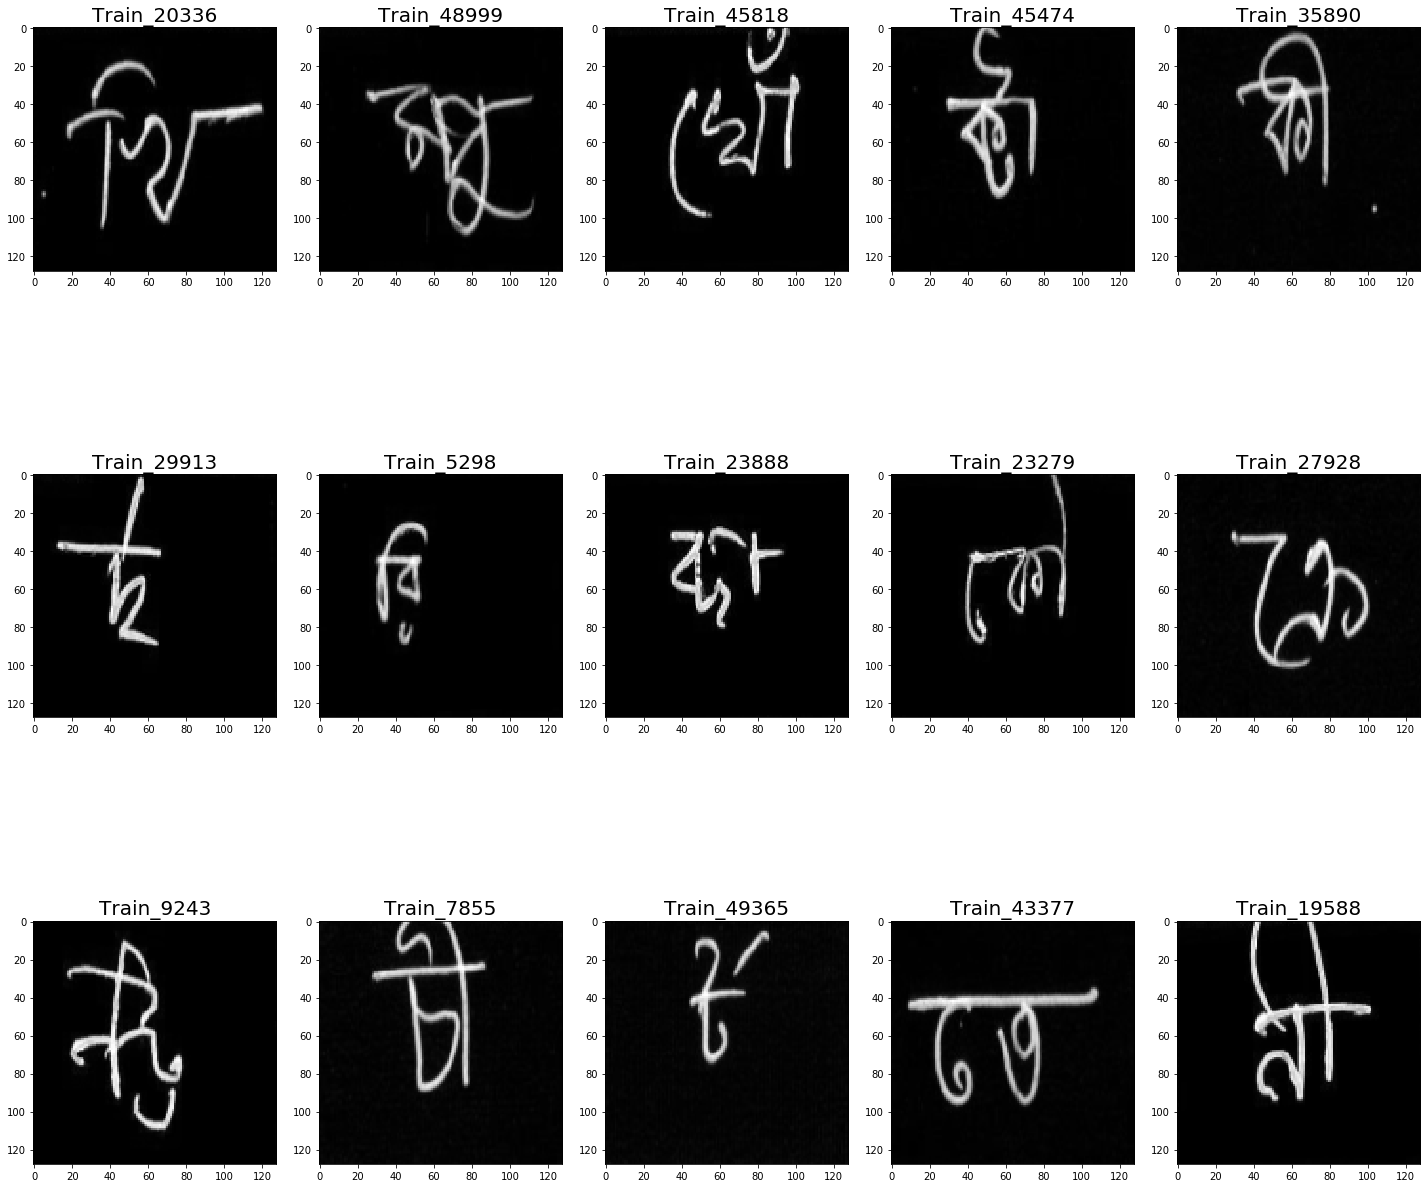

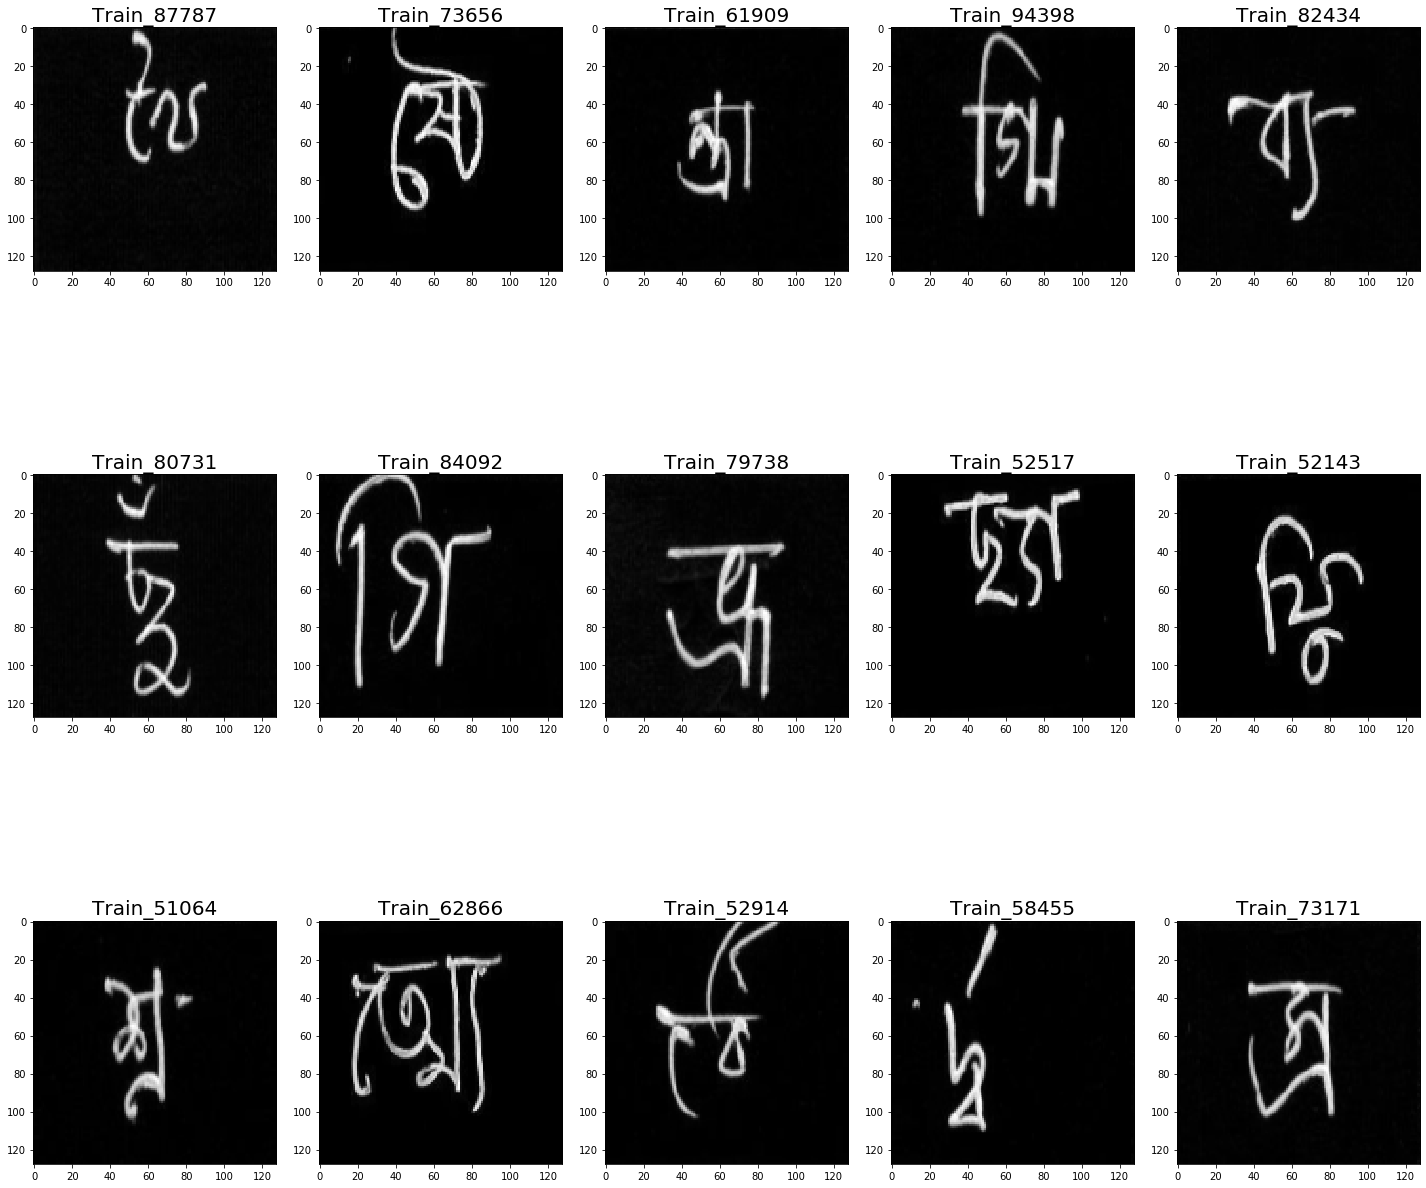

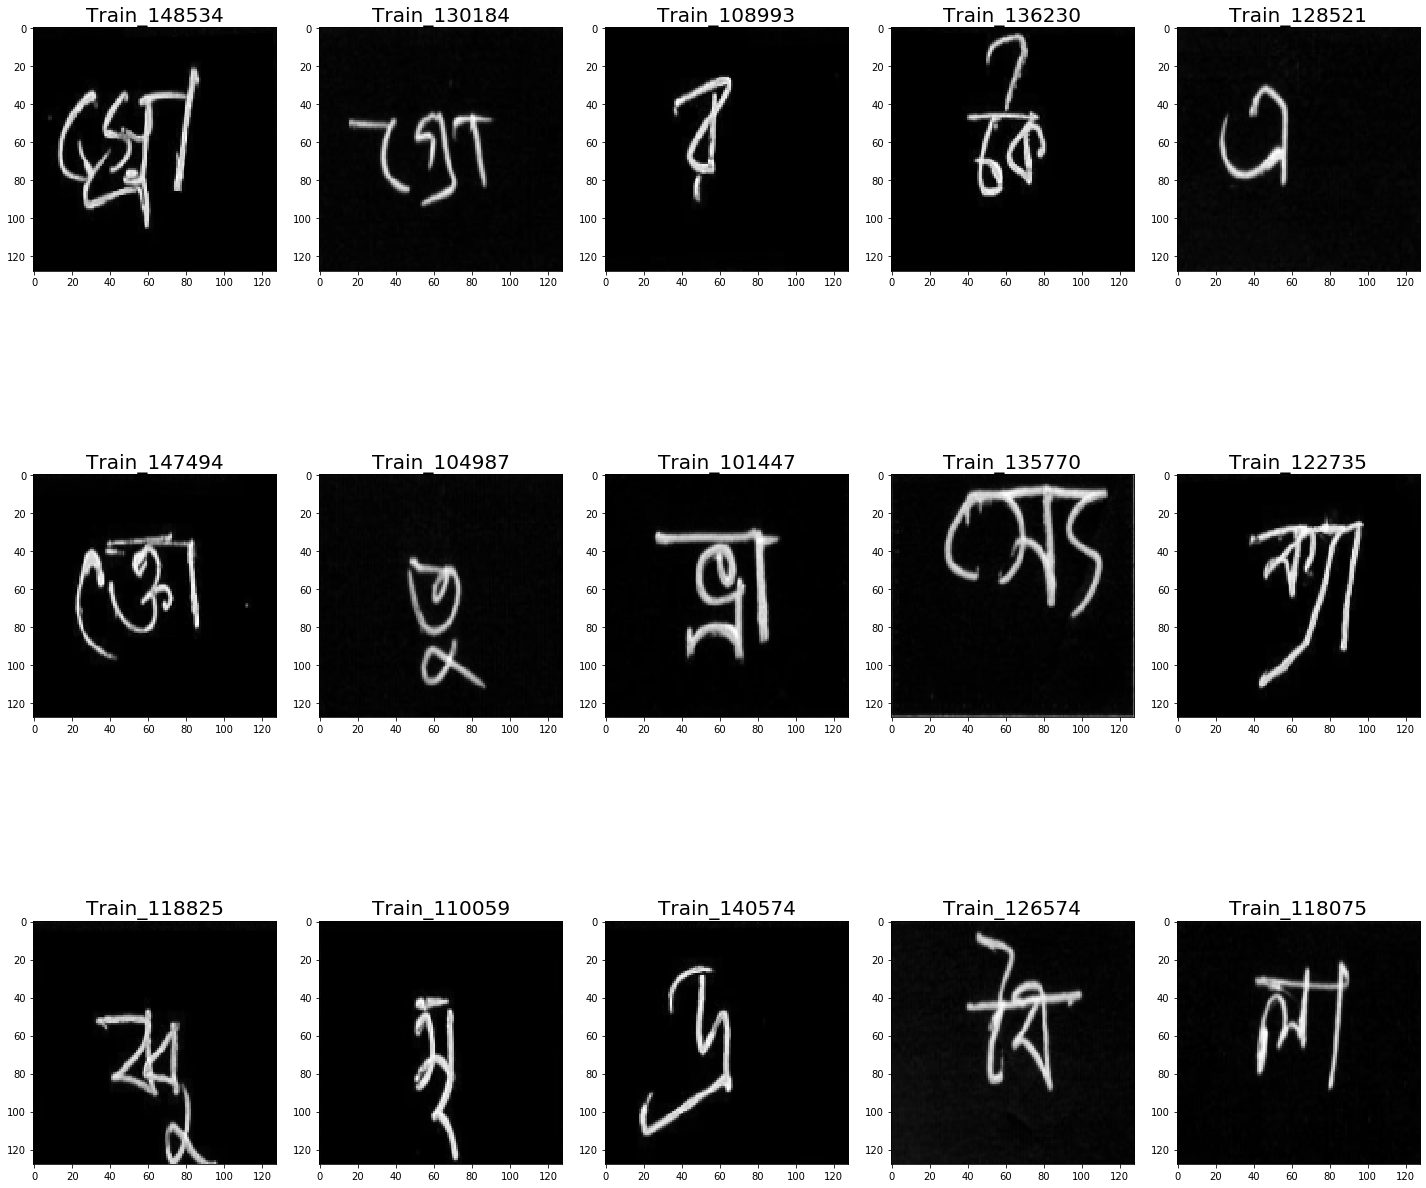

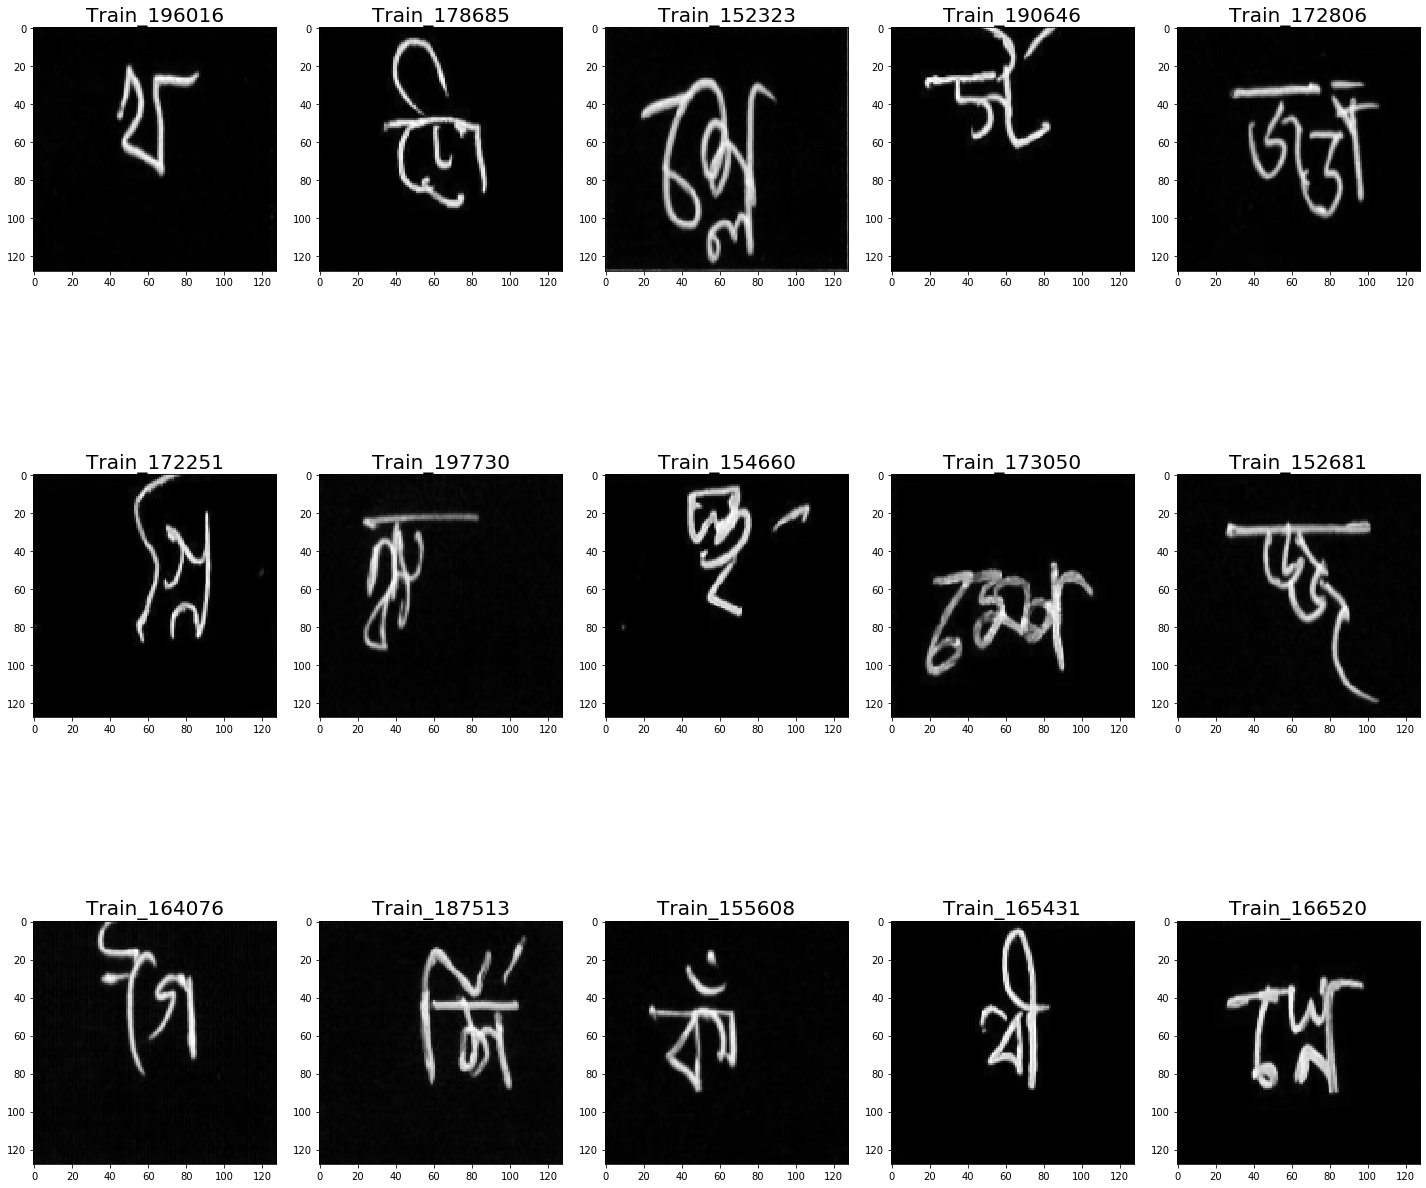

In [9]:
Grapheme_plot(data0)
Grapheme_plot(data1)
Grapheme_plot(data2)
Grapheme_plot(data3)

# 224 Format

In [12]:
start_time = time.time()
data0 = pd.read_parquet('/mnt/m2s2/Repos/kaggle-bengaliai-cv19/input/bengaliai-cv19/train_image_data_0.parquet')
data1 = pd.read_parquet('/mnt/m2s2/Repos/kaggle-bengaliai-cv19/input/bengaliai-cv19/train_image_data_1.parquet')
data2 = pd.read_parquet('/mnt/m2s2/Repos/kaggle-bengaliai-cv19/input/bengaliai-cv19/train_image_data_2.parquet')
data3 = pd.read_parquet('/mnt/m2s2/Repos/kaggle-bengaliai-cv19/input/bengaliai-cv19/train_image_data_3.parquet')
print("--- %s seconds ---" % (time.time() - start_time))

--- 6.667814493179321 seconds ---


In [13]:
data0 = Resize(data0, size=224)
data0.to_feather('BengaliData/feather_resize224/train_data_00_l.feather')
del data0
data1 = Resize(data1, size=224)
data1.to_feather('BengaliData/feather_resize224/train_data_11_l.feather')
del data1
data2 = Resize(data2, size=224)
data2.to_feather('BengaliData/feather_resize224/train_data_22_l.feather')
del data2
data3 = Resize(data3, size=224)
data3.to_feather('BengaliData/feather_resize224/train_data_33_l.feather')
del data3

/home/robmulla/anaconda3/envs/kaggle/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.
